In [10]:
import pandas as pd
from numpy import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

In [11]:
df=pd.read_csv('insurance.csv')

In [12]:
df.head(5)

,age,sex,New_Sex,bmi,children,smoker,New_Smoker,region,New_Region,charges
0,19,female,0,27.900,0,yes,1,southwest,3,16884.92400
1,18,male,1,33.770,1,no,0,southeast,2,1725.55230
2,28,male,1,33.000,3,no,0,southeast,2,4449.46200
3,33,male,1,22.705,0,no,0,northwest,1,21984.47061
4,32,male,1,28.880,0,no,0,northwest,1,3866.85520


In [13]:
# While in excel,I already encoded sex,smoker and region to New_sex,New_smoker and New_Region respectively 
# so that computer  can understand for machine learning task in regression

In [14]:
# So drop uneccessary columns
df=df.drop(['sex','smoker','region'],axis=1)

In [15]:
df.shape

(1338, 7)

In [16]:
df

,age,New_Sex,bmi,children,New_Smoker,New_Region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Data Exploration

### Find correlation between variables


In [17]:
df.corr()

,age,New_Sex,bmi,children,New_Smoker,New_Region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
New_Sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
New_Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
New_Region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


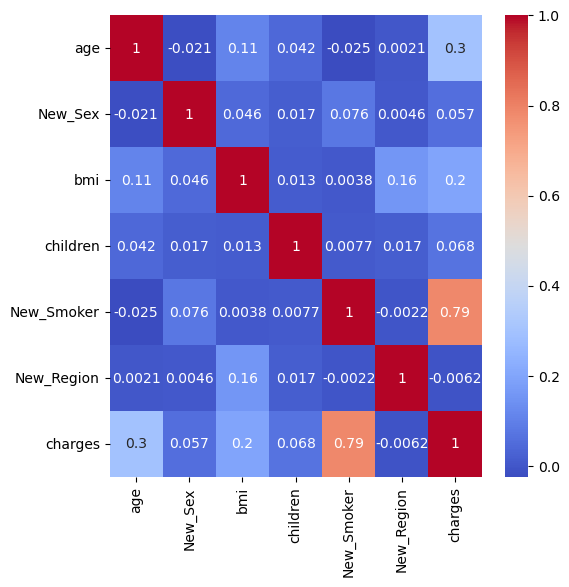

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [19]:
y=df.iloc[:,6]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [20]:
X=df.iloc[:,0:6]
X

,age,New_Sex,bmi,children,New_Smoker,New_Region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


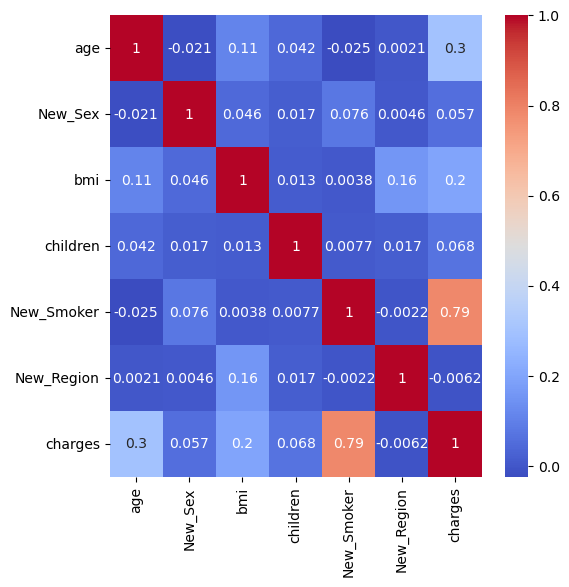

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

So from above we can observe that there is a strong linear correlation between the charges(target) and New_smoker

In [32]:
y=df.iloc[:,6]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
X=df.iloc[:,4]
X

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: New_Smoker, Length: 1338, dtype: int64

### Lets reshape X and y 


We have to reshape X and y because they are both single arrays

In [34]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 1) (936, 1)
(402, 1) (402, 1)


In [38]:
model = LinearRegression()  # define the linear regression model
model.fit(X_train, y_train)  # fit the data

LinearRegression()

In [39]:
print('The weight vector is:', model.coef_)
print()
print('The bias is:', model.intercept_)

The weight vector is: [[9427.649439]]

The bias is: [13379.15730677]


In [40]:
y_pred = model.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[[ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [32442.15260323]
 [32442.15260323]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69

In [41]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

7169.787786759297

In [42]:
r2_score(y_test,y_pred)

0.6494042655991139

---

## Fouth Model

In [58]:
#y=df.iloc[:,6]
y=df.loc[:,'charges']
y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
X=df.loc[:,['bmi','New_Smoker','age']]
X

,bmi,New_Smoker,age
0,27.900,1,19
1,33.770,0,18
2,33.000,0,28
3,22.705,0,33
4,28.880,0,32
...,...,...,...
1333,30.970,0,50
1334,31.920,0,18
1335,36.850,0,18
1336,25.800,0,21


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [62]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 3) (936,)
(402, 3) (402,)


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=4,max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=4)

----

In [64]:
y_pred = rf.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[12775.37746121 10883.34574931 44990.07640531 14757.74068978
 12775.37746121  6823.9922222   3481.26021135 12775.37746121
  6823.9922222   6823.9922222   6823.9922222  10883.34574931
  9006.86226785  6823.9922222  19245.11390289 10883.34574931
 14757.74068978  6823.9922222   6823.9922222  36745.8592188
 25634.8883151  13484.63769161 12775.37746121 25634.8883151
  5209.92619542  6823.9922222   6823.9922222   6823.9922222
  6823.9922222  10883.34574931  6823.9922222  44990.07640531
 14757.74068978 13484.63769161 19245.11390289  6823.9922222
 10883.34574931 36745.8592188  43151.20050617  3481.26021135
  6823.9922222   6823.9922222  20747.50670387 44990.07640531
 36745.8592188   3481.26021135 10883.34574931  9006.86226785
  6823.9922222  13484.63769161  5209.92619542  3481.26021135
 25634.8883151  44990.07640531 14757.74068978  6823.9922222
  6823.9922222  10883.34574931  9006.86226785 14757.74068978
  3481.26021135 44990.07640531 14757.74068978 10883.34574931
 10883.34574931 12775.3774612

In [65]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

4491.7297345354045

In [66]:
r2_score(y_test,y_pred)

0.8734827636485549

In [ ]:
# Predict unseen data
predictions = rf.predict(X) # make predictions for the test data
print(y_pred)

---

### Define pickle

In [76]:
import joblib

In [78]:
# Save the model to a file
joblib.dump(model, 'model.joblib')

['model.joblib']

In [79]:
# #use the ridge regression model
# pickle.dump(clf,open('model.pkl','wb'))

In [80]:
#use the ridge regression model,use joblib for deployments with docker
joblib.dump(clf,open('model.pkl','wb'))

In [30]:
# model=pickle.load(open('model.pkl','rb'))

In [81]:
model=joblib.load(open('model.pkl','rb'))

In [31]:
# model.predict(X_test)

### Get the csv 

In [13]:
# Merge and X and y
df = pd.concat([X, y], axis=1)
# # Next save as a csv
df.to_csv('insurance_1.csv',index=False)

In [14]:
df=pd.read_csv('insurance_1.csv')

In [15]:
df.head(10)

,bmi,New_Smoker,age,charges
0,27.900,1,19,16884.92400
1,33.770,0,18,1725.55230
2,33.000,0,28,4449.46200
3,22.705,0,33,21984.47061
4,28.880,0,32,3866.85520
5,25.740,0,31,3756.62160
6,33.440,0,46,8240.58960
7,27.740,0,37,7281.50560
8,29.830,0,37,6406.41070
9,25.840,0,60,28923.13692


---

### Test the loaded model with a new data

In [157]:
# pickle.dump(rf,open('model.pkl','wb'))

In [158]:
# model=pickle.load(open('model.pkl','rb'))

In [37]:
result=model.predict([[33,0,28]])
print(result)

[181307.37633881]
